### Screwing around with Pandas and Matplotlib for charting
I've been wanted to try charting with some python for a while now. Decided to give it a go using pandas and matplotlib. Very rudamentary for now. Hoping to build out as I get more time.

In [42]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from pandas.plotting import parallel_coordinates

In [9]:
plt.close("all")

#### Data is my own.
I've been tracking my health metrics using [HockeyTracker](https://apps.apple.com/us/app/hockeytracker/id1297971760) for the Apple Watch; it's an excellent app.
<p> I figured I'd use my own metrics instead of some random lot or something else.

In [3]:
hkyData = ("HockeyMetrics.xlsx")
hky = pd.read_excel(hkyData)

In [8]:
print(hky.head())

   GameNum       Date  Max Heart Rate  AVG Heart Rate  Cal  Distance  HRR  \
0        1 2018-04-26             204             150  359      0.84   61   
1        2 2018-05-03             204             151  390      0.75   48   
2        3 2018-05-18             203             148  177      0.81   62   
3        4 2018-05-29             206             155  339      0.51   54   
4        5 2018-06-06             201             157  554      0.85   54   

   Max Speed  Avg Burst  VO2 Max  HFL  Sk8 Eff  Shifts  
0       18.6       11.5     55.6  125     1.56      15  
1       27.5       11.0     55.6  252     1.45      12  
2       17.5       11.4     58.6  139     1.50      13  
3       21.1        9.3     50.7  165     1.42       8  
4       18.7       11.7     52.9  159     1.44      16  


In [70]:
hky[["Max Heart Rate", "AVG Heart Rate"]].describe()

,Max Heart Rate,AVG Heart Rate
count,82.000000,82.000000
mean,198.560976,157.414634
std,3.820340,7.612451
min,188.000000,138.000000
25%,196.250000,152.000000
50%,198.000000,156.500000
75%,201.000000,162.000000
max,210.000000,176.000000


In [71]:
hky.agg({
    "Max Heart Rate": ["min", "max", "mean"]
}
)

,Max Heart Rate
min,188.000000
max,210.000000
mean,198.560976


In [25]:
avgAVGHR = chk[["AVG Heart Rate"]].mean()
avgAVGHR

AVG Heart Rate    157.414634
dtype: float64

In [18]:
#columns=["GameNum", "Date", "Max Heart Rate",
        "AVG Heart Rate", "Cal", "Distance", "HRR", 
        "Max Speed", "Avg Burst", "VO2 Max", "HFL",
        "Sk8 Eff", "Shifts"]

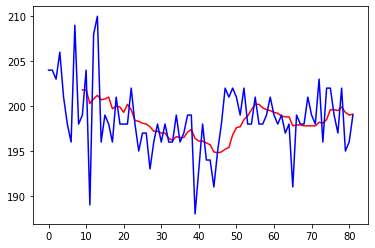

In [92]:
chk = pd.DataFrame(hky, columns=["Max Heart Rate"])

MHRm = chk.rolling(10).mean()
plt.figure();
plt.plot(MHRm, color="r");
plt.plot(chk, color="b");

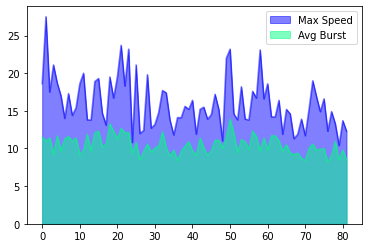

In [93]:
spd = pd.DataFrame(hky, columns=["Max Speed", "Avg Burst"])
spd.plot.area(stacked=False, colormap="winter");

##### Correlation between Average Burst and Distance Skated

0.6217616970203528


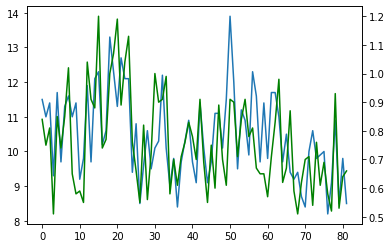

In [69]:
spd = pd.DataFrame(hky, columns=["Avg Burst", "Distance"])

spd["Avg Burst"].plot();
spd["Distance"].plot(secondary_y=True, style="g");
print(spd["Avg Burst"].corr(spd["Distance"], method="spearman"))

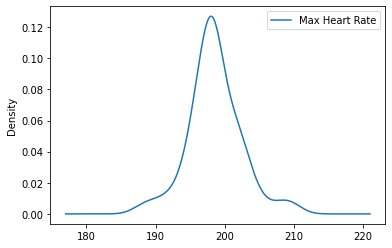

In [55]:
HR = pd.DataFrame(hky, columns=["Max Heart Rate"])
HR.plot.kde();